# Práctica de árboles y ajuste de hiperparámetros

La siguiente práctica consiste en crear un modelo usando árbol de decisión de los datos indios de diabetes encontrados en Kaggle y utilizados en la práctica anterior.

In [1]:
# Importación de bibliotecas de funciones
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
# Etc.

## 1. Carga y preprocesamiento de datos

Haga la carga y las transformaciones necesarias en los datos.  No olvide dividir los datos en entrenamiento y pruebas.  Use una división 85%-15%.

In [3]:
df_diabetes = pd.read_csv("diabetes.csv")

# Check for missing values
print(df_diabetes.isnull().sum())

# Drop rows with missing values (if any)
df_diabetes.dropna(inplace=True)

# Check for duplicate rows and remove them
df_diabetes.drop_duplicates(inplace=True)

# Reset the index after cleaning
df_diabetes.reset_index(drop=True, inplace=True)

# Display basic statistics to verify the dataset
print(df_diabetes.describe())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

## 2. Regresión lineal

Copie acá una versión de la regresión lineal para los datos indios de diabetes.  Puede ser la versión de LASSO, Ridge o Elastic Net, pero eso sí escoja el mejor modelo que obtuvo.

In [4]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

feature_cols = [ 'Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']
X = df_diabetes[feature_cols] # Características (variables independientes)
y = df_diabetes.Insulin # Variable objetivo

n = X.shape[0] # used to calculate f statistics

alphas = [0.01, 0.1, 1, 10, 100]

# LASSO regression with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X, y)

# Predictions and R2 score
y_pred_lasso = lasso_cv.predict(X)
lasso_r2 = r2_score(y, y_pred_lasso)

# Calculate F-statistic
p_lasso = np.sum(lasso_cv.coef_ != 0)  # number of non-zero predictors
if p_lasso > 0:
    lasso_f_statistic = (lasso_r2 / p_lasso) / ((1 - lasso_r2) / (n - p_lasso - 1))
else:
    lasso_f_statistic = np.nan  # avoid division by zero

print(f"F-statistic: {lasso_f_statistic:.3f}")
print(f"Best alpha: {lasso_cv.alpha_}")
print(f"R2 score (train): {lasso_r2:.3f}")
print("Coefficients:", dict(zip(X.columns, lasso_cv.coef_)))

F-statistic: 52.791
Best alpha: 10.0
R2 score (train): 0.294
Coefficients: {'Glucose': 1.1893686585138454, 'BMI': -0.2773071513419544, 'Age': -0.551721396167091, 'DiabetesPedigreeFunction': 0.0, 'SkinThickness': 3.005348539608807, 'Pregnancies': -0.7700873561806191, 'BloodPressure': -0.12611637821623145}


## 3. Primer árbol de decisión

### 3.1 Generación del modelo

Cree un árbol de decisión con los datos cargados utilizando `DecisionTreeClassifier`. Use los hiperparámetros por defecto de la clase. Obtenga la exactitud, la matriz de confusión y el informe de clasificación con las funciones `accuracy_score`, `confusion_matrix` y `classification_report` respectivamente.

In [6]:
# Define the target variable
y_target = df_diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.15, random_state=42)

# Create the Decision Tree Classifier with default hyperparameters
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.750
Confusion Matrix:
[[62 14]
 [15 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        76
           1       0.64      0.62      0.63        40

    accuracy                           0.75       116
   macro avg       0.72      0.72      0.72       116
weighted avg       0.75      0.75      0.75       116



### 3.2 Visualización del modelo (árbol de decisión)

Visualice el árbol usando un código similar a este:

```python
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier,
               feature_names=X.columns,
               class_names=['No Diabetes', 'Diabetes'],  # Ajuste según las etiquetas
               filled=True,
               rounded=True)
plt.savefig('arbol_decision_diabetes.png')
plt.show()
```



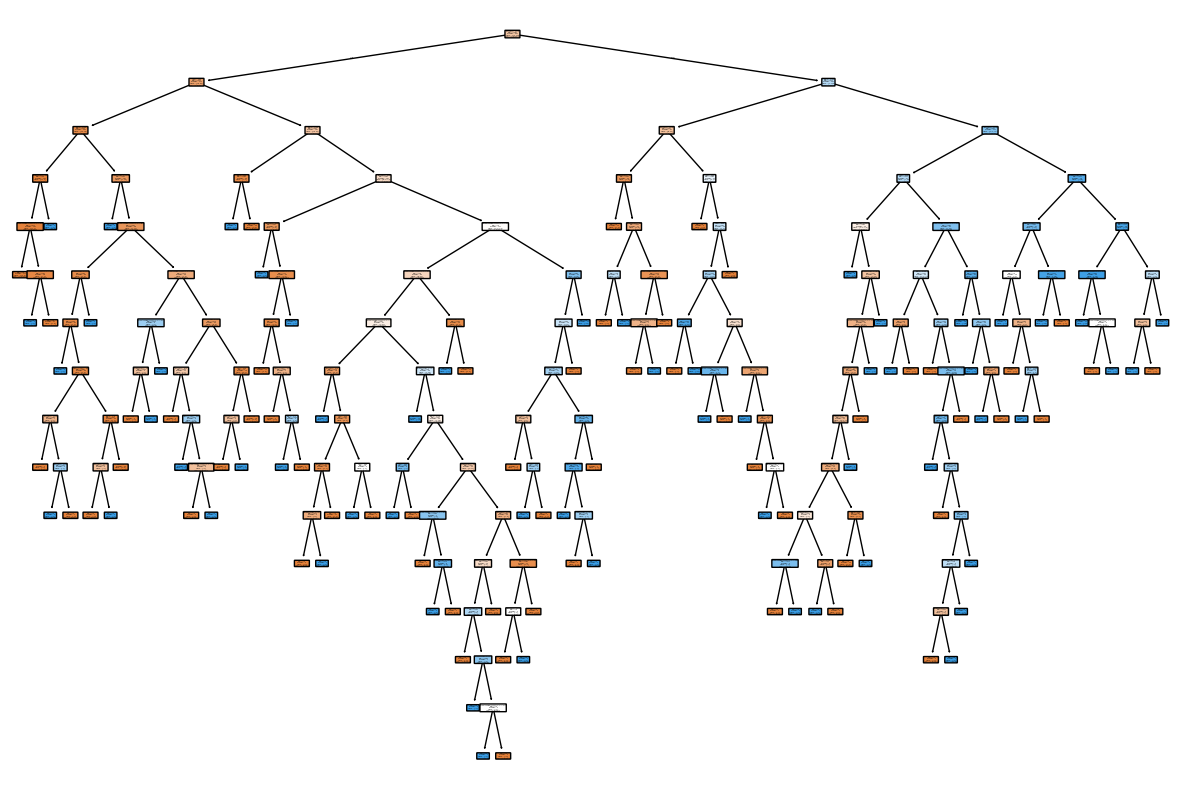

In [7]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier,
               feature_names=X.columns,
               class_names=['No Diabetes', 'Diabetes'],  # Ajuste según las etiquetas
               filled=True,
               rounded=True)
plt.savefig('arbol_decision_diabetes.png')
plt.show()

## 4. Afinamiento de hiperparámetros

Para las siguientes técnicas afine los hiperparámetros del modelo usando los siguientes parámetros de la clase `DecisionTreeClassifier`:


*   max_depth: None, 5, 10, 15, 20
*   min_samples_split: 2, 5, 10
*   min_samples_leaf: 1, 2, 4

### 4.1 *Latin Hypercube Sampling* (LHS)

Utilizando el script en [Latin Hypercube Sampling (LHS) - Integrated Computational Materials Engineering (ICME)](https://www.cavs.msstate.edu/icme/DesignOpt/LHS.php) genere un muestreo en el espacio de búsqueda de los hiperparámetros antes mencionados. Genere 90 muestras. Luego utilice dichas muestras para crear un experimento que permita afinar los hiperparámetros.

#### 4.1.1 Métricas

Obtenga la exactitud, la matriz de confusión y el informe de clasificación.

#### 4.1.2 Visualización del árbol

Visualice el árbol.

### 4.2 Optuna

Utilizando el marco de trabajo [Optuna](https://optuna.org/) genere ensayos en el espacio de búsqueda de los hiperparámetros antes mencionados. Genere 90 ensayos. Con esas especificaciones genere un experimento que permita afinar los hiperparámetros.

#### 4.2.1 Métricas

Obtenga la exactitud, la matriz de confusión y el informe de clasificación.

#### 4.2.2 Visualización del árbol

Visualice el árbol.

### 4.3 GridSearchCV de Scikit-Learn

Utilizando la clase GridSearchCV de Scikit-Learn genere una búsqueda en el espacio de antes mencionados.

#### 4.3.1 Métricas

Obtenga la exactitud, la matriz de confusión y el informe de clasificación.

#### 4.3.2 Visualización del árbol

Visualice el árbol.

## 5 Comparación de los modelos

Cree una tabla de métricas del mejor modelo de las técnicas de regresión lineal y de árbol de decisión. Compare, analice y haga una interpretación del resultado..